# 📌 Model Evaluation

In this notebook, we will evaluate the performance of our trained models using various classification metrics. Our evaluation will include:

## 📊 Standard Metrics
- **Accuracy** (`accuracy_score`) – Measures overall correctness.
- **Precision** (`precision_score`) – Measures how many predicted positives are actual positives.
- **Recall** (`recall_score`) – Measures how well the model identifies actual positives.
- **F1-score** (`f1_score`) – Harmonic mean of precision and recall.

## 📈 Advanced Evaluation
- **ROC Curve & AUC Score** – Evaluates model discrimination ability between classes.
- **Confusion Matrix** – Provides a detailed breakdown of correct and incorrect predictions.

### Import Libraries

In [34]:
import warnings
warnings.filterwarnings("ignore")

import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import label_binarize

### Load the saved models

In [35]:
catboost = joblib.load("Saved_Models/catboost.joblib")
logistic_regression = joblib.load("Saved_Models/logisticRegression.joblib")
random_forest = joblib.load("Saved_Models/randomForest.joblib")

### Load & Split the test dataset

In [36]:
test_data = pd.read_csv('Data_Preprocessed/reduced_test.csv')
X_test = test_data.drop(columns=['Test Results Encoded'])
y_test = test_data['Test Results Encoded']

### Define a function to evaluate models

In [37]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None  # Check if model supports probabilities

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Fixing AUC Score Calculation
    if y_prob is not None and y_prob.ndim == 2:
        auc = roc_auc_score(y_test, y_prob, average='weighted', multi_class='ovr')
    elif y_prob is not None:
        auc = roc_auc_score(y_test, y_prob)  # Binary classification
    else:
        auc = None

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    if auc is not None:
        print(f"AUC Score: {auc:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve for Multi-Class
    if auc is not None and y_prob.ndim == 2:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Convert labels to one-hot encoding
        
        plt.figure(figsize=(6, 5))
        
        for i in range(y_test_bin.shape[1]):  # Loop through each class
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(y_test_bin[:, i], y_prob[:, i]):.4f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend()
        plt.show

### Evaluate all models

CatBoost Performance:
Accuracy: 0.3350
Precision: 0.3344
Recall: 0.3350
F1-score: 0.3342
AUC Score: 0.5004


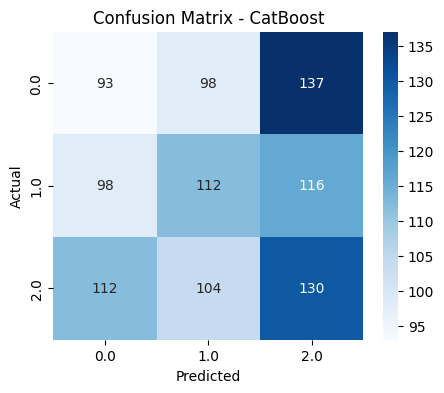

Logistic Regression Performance:
Accuracy: 0.3500
Precision: 0.2310
Recall: 0.3500
F1-score: 0.2628
AUC Score: 0.4890


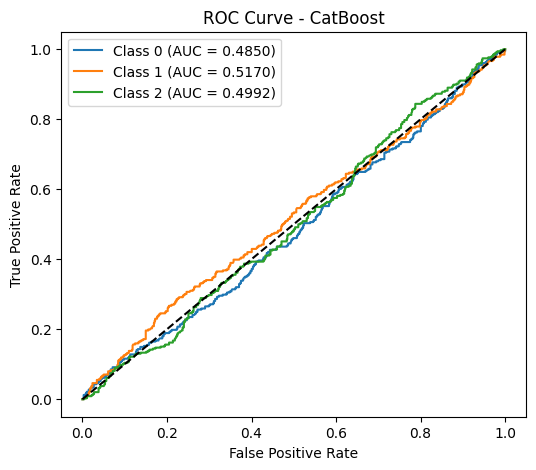

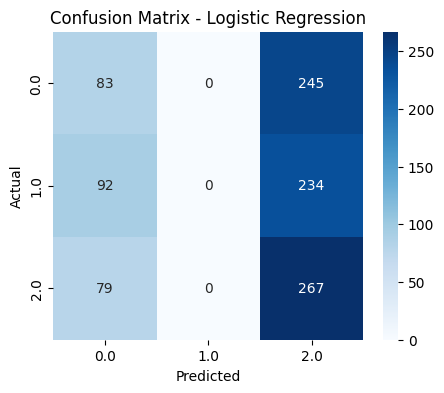

Random Forest Performance:
Accuracy: 0.3130
Precision: 0.3131
Recall: 0.3130
F1-score: 0.3130
AUC Score: 0.4901


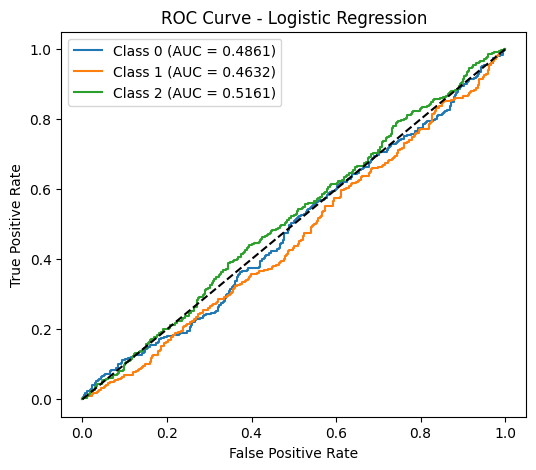

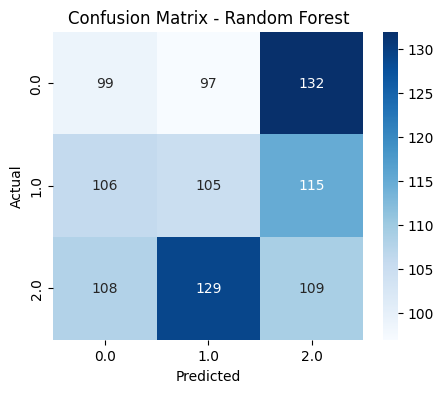

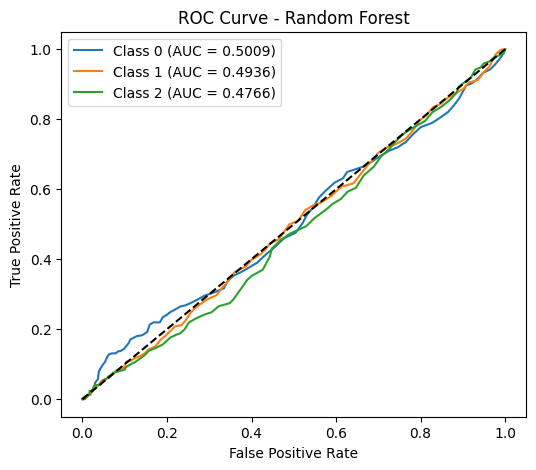

In [38]:
evaluate_model(catboost, X_test, y_test, "CatBoost")
evaluate_model(logistic_regression, X_test, y_test, "Logistic Regression")
evaluate_model(random_forest, X_test, y_test, "Random Forest")

### **Observations**
The best-performing model is **Logistic Regression**, as it achieves the **highest recall**, which is the most critical metric for this problem.  

In **medical diagnosis**, recall (sensitivity) is crucial because it measures how well the model identifies actual positive cases (i.e., patients with the disease). **Missing a positive case (false negative) can have severe consequences**, as an undiagnosed patient may not receive necessary treatment. Therefore, optimizing for **high recall** is preferred over precision or accuracy in this context.  

### **Why is Recall Important?**
- **False negatives (missed diagnoses) can be dangerous.**
- **High recall ensures fewer missed cases.**
- **Precision is secondary since false positives (incorrectly diagnosing a healthy person) are less harmful than false negatives.**